In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
import re
from glob import glob
import thicket as th

# Step 1: Gather all .cali files
cali_files = glob("*.cali")


# Step 4: Create the Thicket object from the .cali files
tk = th.Thicket.from_caliperreader(cali_files)



(2/2) Creating Thicket: 100%|██████████| 187/187 [00:08<00:00, 23.12it/s]


In [3]:
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("data_type")

tk.dataframe.head()

nid   spot.channel  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 22218626   1.0  regionprofile   
                                     30914255   1.0  regionprofile   
                                     114083209  1.0  regionprofile   
                                     139551408  1.0  regionprofile   
                                     154983114  1.0  regionprofile   

                                                Min time/rank  Max time/rank  \
node                                 profile                                   
{'name': 'main', 'type': 'function'} 22218626        0.512112       0.513998   
                                     30914255        6.422356       6.690311   
                                     114083209       0.517320       0.518707   
                                     139551408       0.606527       0.609017   
                                     154983114       0.928639       0.928816   

                                                Avg time/rank   Total time  \
node                                 profile                                 
{'name': 'main', 'type': 'function'} 22218626        0.513398     4.107187   
                                     30914255        6.489609  1661.340030   
                                     114083209       0.518284     4.146273   
                                     139551408       0.608284     4.866273   
                                     154983114       0.928728     1.857455   

                                                Variance time/rank  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 22218626             0.000001   
                                     30914255             0.003205   
                                     114083209            0.000000   
                                     139551408            0.000001   
                                     154983114            0.000000   

                                                Min time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 22218626              0.000238   
                                     30914255              0.000297   
                                     114083209             0.000221   
                                     139551408             0.000237   
                                     154983114             0.000655   

                                                Max time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 22218626              0.000302   
                                     30914255              0.029425   
                                     114083209             0.000304   
                                     139551408             0.000691   
                                     154983114             0.000686   

                                                Avg time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 22218626              0.000262   
                                     30914255              0.000629   
                                     114083209             0.000264   
                                     139551408             0.000323   
                                     154983114             0.000671   

                                                Total time (exc)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 22218626           0.002099   
                                     30914255           0.161084   
                                     114083209          0.002108   
                                     139551408          0.002585   
                                     154983114          

[[32, 128, 512], [64, 256, 1024]]
[[1.0, 0.4935880451733885, 1], [1.0, 0.2388930347145977, 1]]


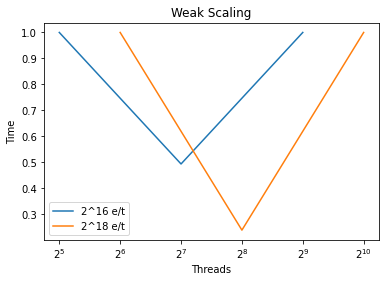

In [34]:
# Filtering the DataFrame for specific conditions
# result = tk.dataframe[(tk.dataframe['name'] == 'main') & 
#                       (tk.dataframe['input_size'] == 65536) & 
#                       (tk.dataframe['num_procs'] == 2)]

# # Check if the filtered result is not empty
# if not result.empty:
#     # Print the specific column "Avg time/rank"
#     avg_time_rank = result['Avg time/rank'].iloc[0]
#     print(avg_time_rank)
# else:
#     print("No matching data found.")
    
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 2), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 2)].empty else "No matching data found."

    
# MPI Only
# For Weak Scaling
thread_l=[]
time=[]
times=[]
l=[]
size=65536
threads=2
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][2]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 2), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 2)].empty else "No matching data found."

# while threads <= 1024:
#         # Get the DataFrame slice for the current iteration
#         current_data = tk.dataframe.loc[
#             (tk.dataframe['name'] == 'main') & 
#             (tk.dataframe['input_size'] == size) &  
#             (tk.dataframe['num_procs'] == threads), 
#             'Avg time/rank'
#         ]

#         # Check if the DataFrame slice is empty
#         if current_data.empty:
#             threads *= 4
#             size *= 4
#             continue  # Skip to the next iteration

#         # If there's data, calculate the time ratio and append it
#         time_ratio = base / current_data.iloc[0]
#         time.append(time_ratio)

#         threads *= 4
#         size *= 4
# l.append(thread_l)
# times.append(time)


# time=[]
# thread_l=[]
# size=65536
# threads=4
# # base=tk.dataframe.loc['main',65536]['Avg time/rank'][4]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 4), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 4)].empty else "No matching data found."

# while threads<=1024:
# #     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     time.append(base / tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1)

#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)



# time=[]
# thread_l=[]
# size=65536
# threads=8
# # base=tk.dataframe.loc['main',65536]['Avg time/rank'][8]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 8), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 8)].empty else "No matching data found."

# while threads<=1024:
# #     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     time.append(base / tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1)

#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)


# time=[]
# thread_l=[]
# size=65536
# threads=16
# # base=tk.dataframe.loc['main',65536]['Avg time/rank'][16]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 16), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 16)].empty else "No matching data found."

# while threads<=1024:
# #     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     time.append(base / tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1)

#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)


time=[]
thread_l=[]
size=65536
threads=32
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][32]
base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 32), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 32)].empty else "No matching data found."

while threads<=1024:
#     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
    time.append(base / tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1)

    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)


time=[]
thread_l=[]
size=65536
threads=64
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][64]
base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 64), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 64)].empty else "No matching data found."

while threads<=1024:
#     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
    time.append(base / tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1)

    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)


# time=[]
# thread_l=[]
# size=65536
# threads=128
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][128]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 128), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 128)].empty else "No matching data found."

# while threads<=1024:
#     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)


# time=[]
# thread_l=[]
# size=65536
# threads=256
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][256]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 256), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 256)].empty else "No matching data found."

# while threads<=1024:
#     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)


# time=[]
# thread_l=[]
# size=65536
# threads=512
# base=tk.dataframe.loc['main',65536]['Avg time/rank'][512]
# base = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 512), 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == 65536) & (tk.dataframe['num_procs'] == 512)].empty else "No matching data found."

# while threads<=1024:
#     time.append(base/tk.dataframe.loc['main',size]['Avg time/rank'][threads])
#     thread_l.append(threads)
#     threads*=4
#     size*=4
# times.append(time)
# l.append(thread_l)


print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^16 e/t", "2^18 e/t","2^20 e/t","2^22 e/t", "2^24 e/t", "2^26 e/t", "2^28 e/t"])
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Time")
plt.title("Weak Scaling")
plt.show()


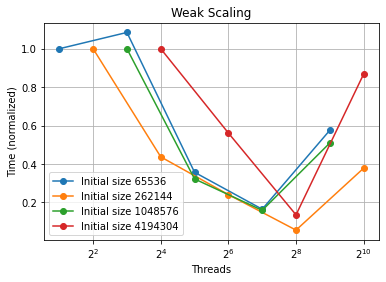

In [69]:
import matplotlib.pyplot as plt
from typing import List

# Initialize lists to store thread and time data
times = []
l = []

# Define sizes for weak scaling (initial size doubles for each curve)
initial_size = 65536
scaling_factors = [2, 4, 8, 16]

# Loop over scaling factors for each plot curve
for threads in scaling_factors:
    time = []
    thread_l = []
    size = initial_size
#     base_time = ctk.dataframe.loc['main', initial_size]['Avg time/rank'][threads]
    base_time = tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == initial_size) & (tk.dataframe['num_procs'] == threads) & (tk.dataframe['data_type'] == 'r') , 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == initial_size) & (tk.dataframe['num_procs'] == threads)].empty else "No matching data found."
#     print(base_time)
    # For weak scaling, increase threads and size together up to 1024 threads
    while threads <= 1024:
#         avg_time = ctk.dataframe.loc['main', size]['Avg time/rank'][threads]
        avg_time= tk.dataframe.loc[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)  & (tk.dataframe['data_type'] == 'r')  , 'Avg time/rank'].iloc[0] if not tk.dataframe[(tk.dataframe['name'] == 'main') & (tk.dataframe['input_size'] == size) & (tk.dataframe['num_procs'] == threads)].empty else 1
        
        time.append(base_time / avg_time)
        thread_l.append(threads)
        
        # Scale up for weak scaling
        threads *= 4
        size *= 4
    
    # Store results for each curve
    times.append(time)
    l.append(thread_l)
    
# print(times)
# print(l)

# Plotting each set of results
for i in range(len(times)):
    plt.plot(l[i], times[i], marker='o')

# Define and set legend for each weak scaling factor
legend_labels = [f"Initial size {initial_size * (4 ** i)}" for i in range(len(scaling_factors))]
plt.legend(legend_labels)
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Time (normalized)")
plt.title("Weak Scaling")
plt.grid(True, which='both')
plt.show()


In [93]:
def plot_weak_scaling(df, input_type, title):
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current input_type
    subset = df.xs(input_type, level='data_type', drop_level=False)

    # Get unique input sizes for plotting
    input_sizes = subset.index.get_level_values('input_size').unique()

    # Plot normalized weak scaling for each input size
    for size in input_sizes:
        size_subset = subset.xs(size, level='data_type', drop_level=False)
        
        # Group by number of processes and calculate mean time per rank
        mean_times = size_subset.groupby('num_procs')['Avg time/rank'].mean()

        # Normalize by the smallest mean time to show relative scaling
        initial_time = mean_times.iloc[0]
        normalized_times = mean_times / initial_time

        # Plot normalized times for the current input size
        plt.plot(normalized_times.index, normalized_times.values, label=f'Input Size $2^{{{int(np.log2(size))}}}$', marker='o')

    plt.title(f"{title}: Normalized Weak Scaling for {input_type.capitalize()} Input")
    plt.xlabel('Number of Processes')
    plt.ylabel('Normalized Avg Time per Rank')
    plt.xscale('log', base=2)
    plt.grid(True)
    plt.legend(title="Input Sizes")
    plt.show()
    
for node in tk.graph.traverse():
    if node.frame['name'] == 'comp' or node.frame['name'] == 'comm' or node.frame['name'] == 'main':
        print(tk.dataframe.loc[node].index.get_level_values("input_size").unique())
#         input_sizes = tk.dataframe.loc[node].index.get_level_values("input_size").unique()
#         input_types = tk.dataframe.loc[node].index.get_level_values("data_type").unique()

#         # Exclude 'NaN' and 'Random' from input_types
#         input_types = [t for t in input_types if pd.notna(t) and t != 'Random']

#         # Strong scaling plots for each input size
#         for input_size in input_sizes:
#             plot_strong_scaling(tk.dataframe.loc[node], input_size, node.frame['name'])
#     if node.frame['name'] == 'main':  # Adjust if different function of interest
#         input_types = tk.dataframe.loc[node].index.get_level_values("data_type").unique()
#         for input_type in input_types:
#             if pd.notna(input_type):
#                 plot_weak_scaling(tk.dataframe.loc[node], input_type, node.frame['name'])
    
    

KeyError: 'Requested level (input_size) does not match index name (profile)'

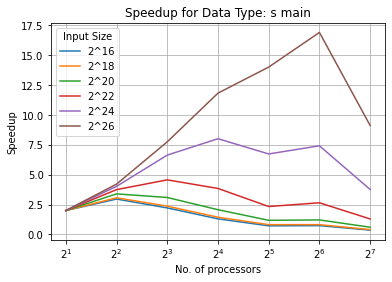

Plot saved as speedup_plot_s_main.png


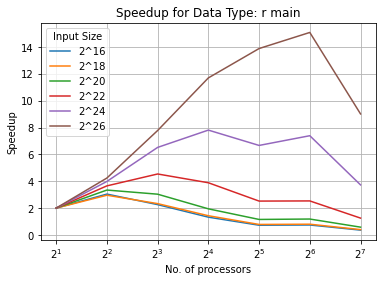

Plot saved as speedup_plot_r_main.png


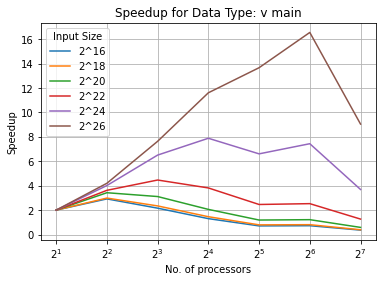

Plot saved as speedup_plot_v_main.png


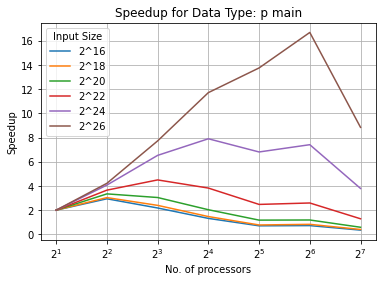

Plot saved as speedup_plot_p_main.png


In [22]:
import matplotlib.pyplot as plt

# Define input sizes and thread counts (number of processes)
n_vals = [65536, 262144, 1048576, 4194304, 16777216, 67108864]
thread_counts = [2, 4, 8, 16, 32, 64, 128]  # Replace with actual numbers of threads/ranks as needed
legends = ["2^16", "2^18", "2^20", "2^22", "2^24", "2^26"]  # Legend labels for input sizes
data_types = ['s', 'r', 'v', 'p']  # List of data types to filter

for node in tk.graph.traverse():
#     if node.frame['name'] == 'comp' or node.frame['name'] == 'comm' or node.frame['name'] == 'main':
    if node.frame['name'] == 'main':
        
        df = tk.dataframe.loc[node]

# Loop through each data type
for data_type in data_types:
    plt.figure()  # Create a new figure for each data type
    plt.title(f"Speedup for Data Type: {data_type} main")  # Set the title for the plot
    
     # Prepare lists to store the x and y values for export
    x_export = []
    y_export = []


    # Loop through each input size to calculate and plot speedup
    for n_val, label in zip(n_vals, legends):
        # Filter the dataframe by input size and data type
        df_filtered = df[(df['input_size'] == n_val) & (df['data_type'] == data_type)]
#         print(df_filtered.head())

        # Extract baseline time for 2 threads/processes
        baseline_rows = df_filtered[df_filtered['num_procs'] == 2]
        if baseline_rows.empty:
            print(f"No baseline data available for input size {n_val} with 2 processors and data_type {data_type}.")
            continue
        
        baseline_time = baseline_rows['Avg time/rank'].values[0]

        # Calculate speedup for each thread count
        speedup_values = []
        for threads in thread_counts:
            # Check if data for this number of threads exists
            thread_row = df_filtered[df_filtered['num_procs'] == threads]
            if not thread_row.empty:
                time_for_threads = thread_row['Avg time/rank'].values[0]
                speedup = 2 * baseline_time / time_for_threads
                speedup_values.append(speedup)
                
                # Store x and y values for 2^16 input size
                if n_val == 67108864:
                    x_export.append(threads)
                    y_export.append(speedup)
                    
            else:
                speedup_values.append(None)  # Placeholder for missing data
                print(f"No data available for input size {n_val} with {threads} processors and data_type {data_type} main.")

        # Plot speedup for current input size
        plt.plot(thread_counts, speedup_values, label=label)

    # Configure plot settings
    plt.xscale("log", base=2)  # Logarithmic scale for thread counts
    plt.xlabel("No. of processors")
    plt.ylabel("Speedup")
    plt.legend(title="Input Size")
    plt.grid(True)  # Optional: add grid for better visibility
    # Save and show the plot for the current data type
    filename = f"speedup_plot_{data_type}_main.png"
    plt.savefig(filename, format='png')  # Save plot as PNG
    plt.show()  # Display the plot
    plt.close()  # Close the figure to prevent overlap

    print(f"Plot saved as {filename}")
    # Output x and y values for input size 2^16 to a CSV file
    if x_export and y_export:
        export_df = pd.DataFrame({
            'No. of processors': x_export,
            'Speedup': y_export,
            'Data Type': data_type
        })
        export_df.to_csv(f"speedup_data_{data_type}_2^26.csv", index=False)


View Calltree

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os


# Print the dataframe columns to check for data_type, input_size, and num_procs
# print("Columns in dataframe:", tk.dataframe.columns)

# Reset the index and organize the data for easy plotting
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "data_type"]).sort_index()

# Print the head of the dataframe to verify structure
# print(tk.dataframe.head())

# Function to plot strong scaling for each input size
def plot_strong_scaling(df, input_size, title):
    os.makedirs('figures', exist_ok=True)

    plt.figure(figsize=(15, 7), facecolor='white')
    export_data = []
    
    for data_type in df.index.get_level_values('data_type').unique():
        subset = df.xs((input_size, data_type), level=('input_size', 'data_type'), drop_level=False)
#         print(subset)

        # Filter out non-positive values for plotting
        subset = subset[subset['Avg time/rank'] > 0]
        
        if not subset.empty:
            plt.plot(subset.index.get_level_values('num_procs'), subset['Avg time/rank'], label=f'{data_type}', marker='o')
            
         # Append data for CSV, including "sample_sort" and data_type
            for num_procs, avg_time in zip(subset.index.get_level_values('num_procs'), subset['Avg time/rank']):
                export_data.append([num_procs, avg_time, "sample_sort", data_type])

    # Export data to CSV file with data_type column
    csv_path = f"figures/{title}_{input_size}_strong_scaling_data.csv"
    export_df = pd.DataFrame(export_data, columns=['Number of Processes', 'Avg Time per Rank (seconds)', 'Algorithm', 'Data Type'])
    export_df.to_csv(csv_path, index=False)
    
    if pd.notna(input_size):
        input_size_str = f"$2^{{{int(np.log2(input_size))}}}$"
    else:
        input_size_str = "Unknown Size"

    plt.title(f"{title}: Strong Scaling (Input Size: {input_size_str})")
    plt.xlabel('Number of Processes')
    plt.ylabel('Avg Time per Rank (seconds)')
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    save_path = f"figures/{title}_{input_size_str}_strong_scaling.png"
    plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.close()



# Example of plotting for a specific function and implementation
for node in tk.graph.traverse():
    if node.frame['name'] == 'comp' or node.frame['name'] == 'comm' or node.frame['name'] == 'main':
#     if node.frame['name'] == 'main':
        
        input_sizes = tk.dataframe.loc[node].index.get_level_values("input_size").unique().tolist()
#         print(tk.dataframe.columns)
        data_types = tk.dataframe.loc[node].index.get_level_values("data_type").unique().tolist()


        # Exclude 'NaN' and 'Random' from data_types
        data_type = [t for t in data_types if pd.notna(t) and t != 'Random']

        # Strong scaling plots for each input size
        for input_size in input_sizes:
            plot_strong_scaling(tk.dataframe.loc[node], input_size, node.frame['name'])

#         # Strong scaling speedup plots for each input type
#         # Get the base time by filtering num_procs == 2 within the current node subset
#         node_df = tk.dataframe.loc[node]  # Filter the dataframe for the current node
#         base_time = node_df[node_df.index.get_level_values('num_procs') == 2]['Avg time/rank'].values[0]

#         for data_type in data_types:
#             plot_speedup(tk.dataframe.loc[node], data_type, base_time, node.frame['name'])

        # Weak scaling plots for each input type
#         for data_type in data_types:
#             plot_weak_scaling(tk.dataframe.loc[node], data_type, node.frame['name'])


In [ ]:
### Weak Scaling

Group Performance data by `matrix_size` in the Thicket metadata table.

No data available for size 16777216, input type 's', category 'comm', and threads 512
No data available for size 16777216, input type 's', category 'comm', and threads 1024
No data available for size 4194304, input type 's', category 'comm', and threads 512
No data available for size 4194304, input type 's', category 'comm', and threads 1024
No data available for size 1048576, input type 's', category 'comm', and threads 512
No data available for size 1048576, input type 's', category 'comm', and threads 1024
No data available for size 262144, input type 's', category 'comm', and threads 512
No data available for size 262144, input type 's', category 'comm', and threads 1024
No base time available for initial size 65536, input type 's', category 'comm', and threads 512
No base time available for initial size 65536, input type 's', category 'comm', and threads 1024


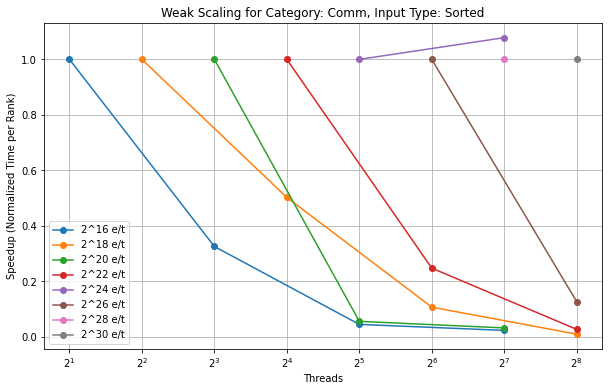

Plot saved to weak_scaling_plots/weak_scaling_comm_sorted.png
No data available for size 16777216, input type 'r', category 'comm', and threads 512
No data available for size 16777216, input type 'r', category 'comm', and threads 1024
No data available for size 4194304, input type 'r', category 'comm', and threads 512
No data available for size 4194304, input type 'r', category 'comm', and threads 1024
No data available for size 1048576, input type 'r', category 'comm', and threads 512
No data available for size 1048576, input type 'r', category 'comm', and threads 1024
No data available for size 262144, input type 'r', category 'comm', and threads 512
No data available for size 262144, input type 'r', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'r', category 'comm', and threads 512
No base time available for initial size 65536, input type 'r', category 'comm', and threads 1024


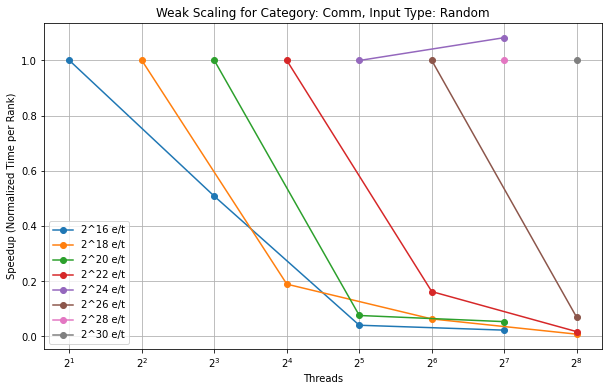

Plot saved to weak_scaling_plots/weak_scaling_comm_random.png
No data available for size 16777216, input type 'v', category 'comm', and threads 512
No data available for size 16777216, input type 'v', category 'comm', and threads 1024
No data available for size 4194304, input type 'v', category 'comm', and threads 512
No data available for size 4194304, input type 'v', category 'comm', and threads 1024
No data available for size 1048576, input type 'v', category 'comm', and threads 512
No data available for size 1048576, input type 'v', category 'comm', and threads 1024
No data available for size 262144, input type 'v', category 'comm', and threads 512
No data available for size 262144, input type 'v', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'v', category 'comm', and threads 512
No base time available for initial size 65536, input type 'v', category 'comm', and threads 1024


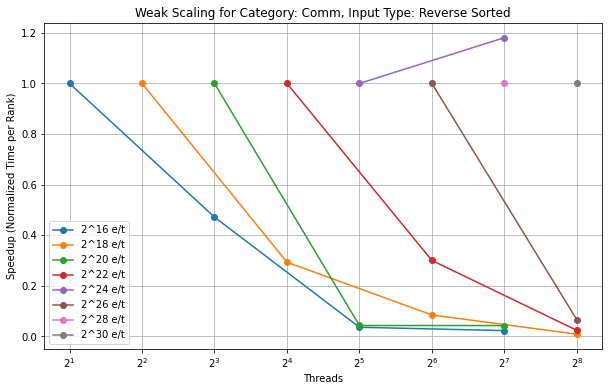

Plot saved to weak_scaling_plots/weak_scaling_comm_reverse_sorted.png
No data available for size 16777216, input type 'p', category 'comm', and threads 512
No data available for size 16777216, input type 'p', category 'comm', and threads 1024
No data available for size 4194304, input type 'p', category 'comm', and threads 512
No data available for size 4194304, input type 'p', category 'comm', and threads 1024
No data available for size 1048576, input type 'p', category 'comm', and threads 512
No data available for size 1048576, input type 'p', category 'comm', and threads 1024
No data available for size 262144, input type 'p', category 'comm', and threads 512
No data available for size 262144, input type 'p', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'p', category 'comm', and threads 512
No base time available for initial size 65536, input type 'p', category 'comm', and threads 1024


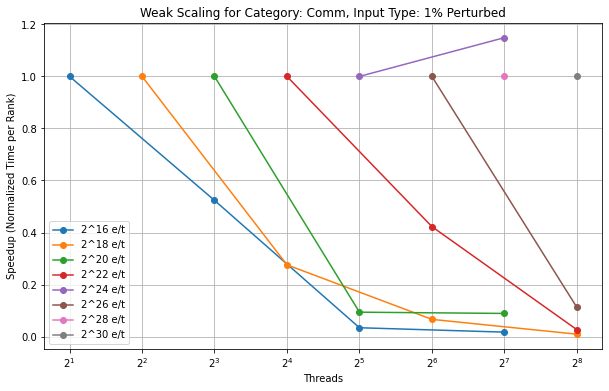

Plot saved to weak_scaling_plots/weak_scaling_comm_1%_perturbed.png
No data available for size 16777216, input type 's', category 'comp', and threads 512
No data available for size 16777216, input type 's', category 'comp', and threads 1024
No data available for size 4194304, input type 's', category 'comp', and threads 512
No data available for size 4194304, input type 's', category 'comp', and threads 1024
No data available for size 1048576, input type 's', category 'comp', and threads 512
No data available for size 1048576, input type 's', category 'comp', and threads 1024
No data available for size 262144, input type 's', category 'comp', and threads 512
No data available for size 262144, input type 's', category 'comp', and threads 1024
No base time available for initial size 65536, input type 's', category 'comp', and threads 512
No base time available for initial size 65536, input type 's', category 'comp', and threads 1024


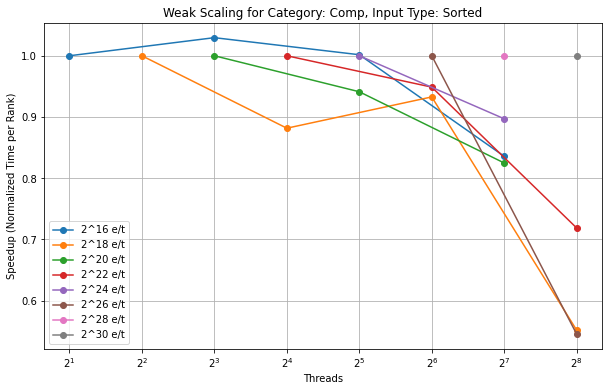

Plot saved to weak_scaling_plots/weak_scaling_comp_sorted.png
No data available for size 16777216, input type 'r', category 'comp', and threads 512
No data available for size 16777216, input type 'r', category 'comp', and threads 1024
No data available for size 4194304, input type 'r', category 'comp', and threads 512
No data available for size 4194304, input type 'r', category 'comp', and threads 1024
No data available for size 1048576, input type 'r', category 'comp', and threads 512
No data available for size 1048576, input type 'r', category 'comp', and threads 1024
No data available for size 262144, input type 'r', category 'comp', and threads 512
No data available for size 262144, input type 'r', category 'comp', and threads 1024
No base time available for initial size 65536, input type 'r', category 'comp', and threads 512
No base time available for initial size 65536, input type 'r', category 'comp', and threads 1024


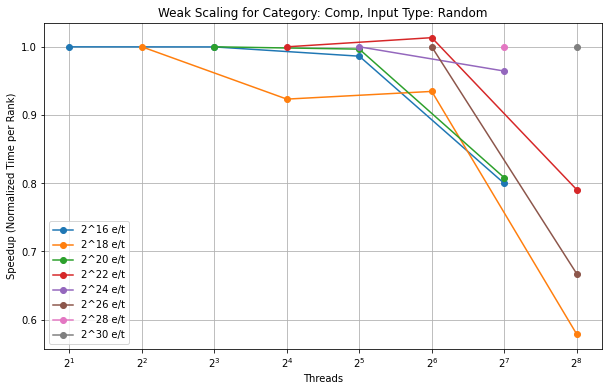

Plot saved to weak_scaling_plots/weak_scaling_comp_random.png
No data available for size 16777216, input type 'v', category 'comp', and threads 512
No data available for size 16777216, input type 'v', category 'comp', and threads 1024
No data available for size 4194304, input type 'v', category 'comp', and threads 512
No data available for size 4194304, input type 'v', category 'comp', and threads 1024
No data available for size 1048576, input type 'v', category 'comp', and threads 512
No data available for size 1048576, input type 'v', category 'comp', and threads 1024
No data available for size 262144, input type 'v', category 'comp', and threads 512
No data available for size 262144, input type 'v', category 'comp', and threads 1024
No base time available for initial size 65536, input type 'v', category 'comp', and threads 512
No base time available for initial size 65536, input type 'v', category 'comp', and threads 1024


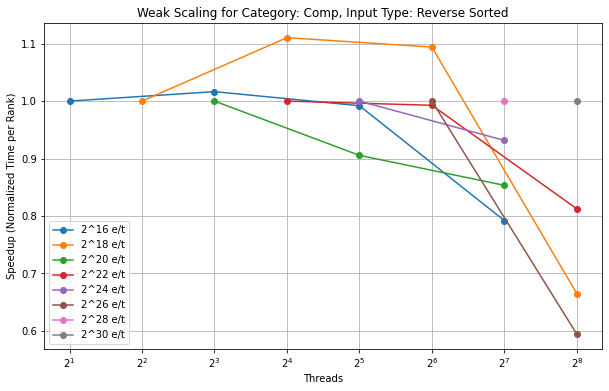

Plot saved to weak_scaling_plots/weak_scaling_comp_reverse_sorted.png
No data available for size 16777216, input type 'p', category 'comp', and threads 512
No data available for size 16777216, input type 'p', category 'comp', and threads 1024
No data available for size 4194304, input type 'p', category 'comp', and threads 512
No data available for size 4194304, input type 'p', category 'comp', and threads 1024
No data available for size 1048576, input type 'p', category 'comp', and threads 512
No data available for size 1048576, input type 'p', category 'comp', and threads 1024
No data available for size 262144, input type 'p', category 'comp', and threads 512
No data available for size 262144, input type 'p', category 'comp', and threads 1024
No base time available for initial size 65536, input type 'p', category 'comp', and threads 512
No base time available for initial size 65536, input type 'p', category 'comp', and threads 1024


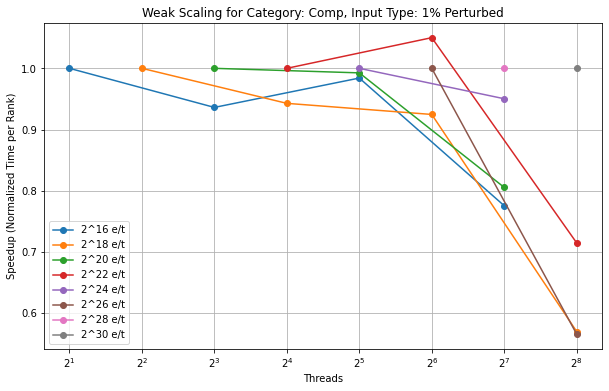

Plot saved to weak_scaling_plots/weak_scaling_comp_1%_perturbed.png
No data available for size 16777216, input type 's', category 'main', and threads 512
No data available for size 16777216, input type 's', category 'main', and threads 1024
No data available for size 4194304, input type 's', category 'main', and threads 512
No data available for size 4194304, input type 's', category 'main', and threads 1024
No data available for size 1048576, input type 's', category 'main', and threads 512
No data available for size 1048576, input type 's', category 'main', and threads 1024
No data available for size 262144, input type 's', category 'main', and threads 512
No data available for size 262144, input type 's', category 'main', and threads 1024
No base time available for initial size 65536, input type 's', category 'main', and threads 512
No base time available for initial size 65536, input type 's', category 'main', and threads 1024


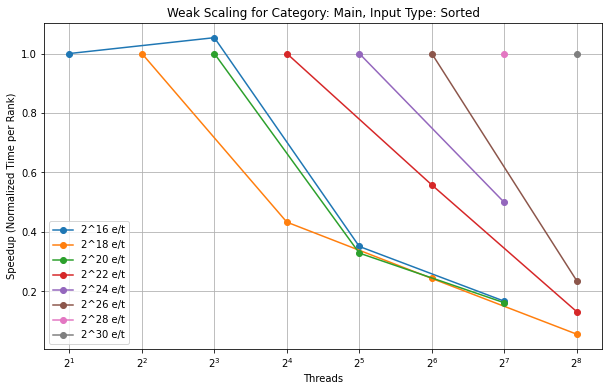

Plot saved to weak_scaling_plots/weak_scaling_main_sorted.png
No data available for size 16777216, input type 'r', category 'main', and threads 512
No data available for size 16777216, input type 'r', category 'main', and threads 1024
No data available for size 4194304, input type 'r', category 'main', and threads 512
No data available for size 4194304, input type 'r', category 'main', and threads 1024
No data available for size 1048576, input type 'r', category 'main', and threads 512
No data available for size 1048576, input type 'r', category 'main', and threads 1024
No data available for size 262144, input type 'r', category 'main', and threads 512
No data available for size 262144, input type 'r', category 'main', and threads 1024
No base time available for initial size 65536, input type 'r', category 'main', and threads 512
No base time available for initial size 65536, input type 'r', category 'main', and threads 1024


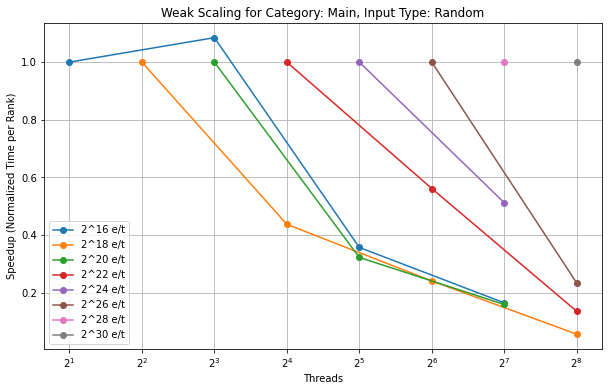

Plot saved to weak_scaling_plots/weak_scaling_main_random.png
No data available for size 16777216, input type 'v', category 'main', and threads 512
No data available for size 16777216, input type 'v', category 'main', and threads 1024
No data available for size 4194304, input type 'v', category 'main', and threads 512
No data available for size 4194304, input type 'v', category 'main', and threads 1024
No data available for size 1048576, input type 'v', category 'main', and threads 512
No data available for size 1048576, input type 'v', category 'main', and threads 1024
No data available for size 262144, input type 'v', category 'main', and threads 512
No data available for size 262144, input type 'v', category 'main', and threads 1024
No base time available for initial size 65536, input type 'v', category 'main', and threads 512
No base time available for initial size 65536, input type 'v', category 'main', and threads 1024


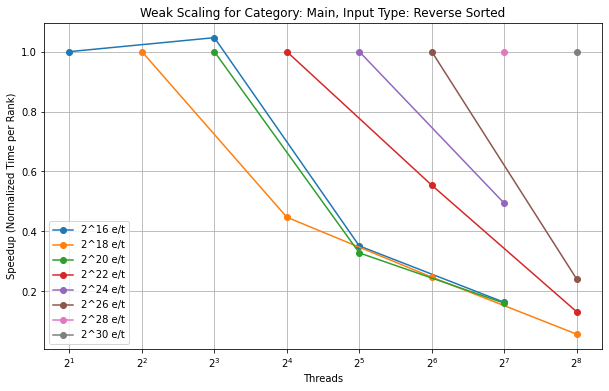

Plot saved to weak_scaling_plots/weak_scaling_main_reverse_sorted.png
No data available for size 16777216, input type 'p', category 'main', and threads 512
No data available for size 16777216, input type 'p', category 'main', and threads 1024
No data available for size 4194304, input type 'p', category 'main', and threads 512
No data available for size 4194304, input type 'p', category 'main', and threads 1024
No data available for size 1048576, input type 'p', category 'main', and threads 512
No data available for size 1048576, input type 'p', category 'main', and threads 1024
No data available for size 262144, input type 'p', category 'main', and threads 512
No data available for size 262144, input type 'p', category 'main', and threads 1024
No base time available for initial size 65536, input type 'p', category 'main', and threads 512
No base time available for initial size 65536, input type 'p', category 'main', and threads 1024


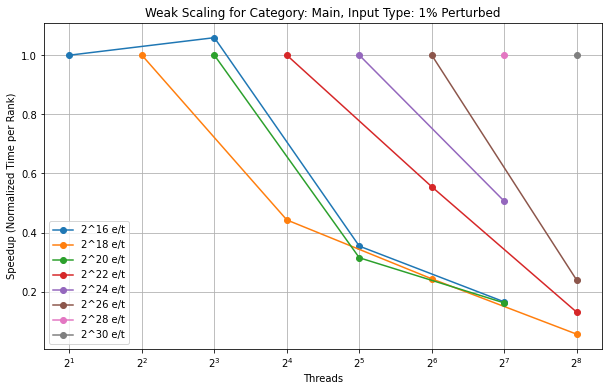

Plot saved to weak_scaling_plots/weak_scaling_main_1%_perturbed.png


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the directory to save plots if it doesn't exist
output_dir = "weak_scaling_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# MPI Only
# For Weak Scaling

def calculate_weak_scaling(tk, input_type, category, initial_size=65536, max_threads=1024):
    times = []
    l = []

    # List of starting thread counts
    starting_threads = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    # Loop through each starting thread count
    for threads in starting_threads:
        time = []
        thread_l = []

        size = initial_size
        current_threads = threads

        # Filter the dataframe for the required initial size, input type, and category
        base_df = tk.dataframe[(tk.dataframe['input_size'] == initial_size) &
                               (tk.dataframe['data_type'] == input_type) &
                               (tk.dataframe['name'] == category) &
                               (tk.dataframe['num_procs'] == threads)]

        # Check if there is data for the current configuration
        if base_df.empty:
            print(f"No base time available for initial size {initial_size}, input type '{input_type}', category '{category}', and threads {threads}")
            continue

        # Get the base time for the current starting number of threads
        base = base_df['Avg time/rank'].values[0]

        # Loop through each scaling configuration
        while current_threads <= max_threads:
            # Filter for the current size and threads
            current_df = tk.dataframe[(tk.dataframe['input_size'] == size) &
                                      (tk.dataframe['data_type'] == input_type) &
                                      (tk.dataframe['name'] == category) &
                                      (tk.dataframe['num_procs'] == current_threads)]

            # Check if there is data for the current configuration
            if current_df.empty:
                print(f"No data available for size {size}, input type '{input_type}', category '{category}', and threads {current_threads}")
            else:
                # Calculate the speedup
                avg_time = current_df['Avg time/rank'].values[0]
                speedup = base / avg_time
                time.append(speedup)
                thread_l.append(current_threads)

            # Update the number of threads and input size
            current_threads *= 4
            size *= 4

        # Append results if any data was found
        if time:
            times.append(time)
            l.append(thread_l)

    return l, times

# Categories and input types to iterate through
categories = ['comm', 'comp', 'main']
input_types = ['s', 'r', 'v', 'p']
input_type_labels = {
    's': 'Sorted',
    'r': 'Random',
    'v': 'Reverse Sorted',
    'p': '1% Perturbed'
}

# Iterate through each category and input type to generate plots
for category in categories:
    for input_type in input_types:
        l, times = calculate_weak_scaling(tk, input_type, category)

        # Plot the results if any data was generated
        if times:
            plt.figure(figsize=(10, 6))
            for i in range(len(times)):
                plt.plot(l[i], times[i], marker='o')

            plt.legend([f"2^{int(np.log2(65536 * (4**i)))} e/t" for i in range(len(times))])
            plt.xscale("log", base=2)
            plt.xlabel("Threads")
            plt.ylabel("Speedup (Normalized Time per Rank)")
            plt.title(f"Weak Scaling for Category: {category.capitalize()}, Input Type: {input_type_labels[input_type]}")
            plt.grid(True)
            
            
            # Save the plot as a PNG file
            plot_filename = f"weak_scaling_{category}_{input_type_labels[input_type].replace(' ', '_').lower()}.png"
            plot_path = os.path.join(output_dir, plot_filename)
            plt.savefig(plot_path, format='png')
            plt.show()
            plt.close()
            print(f"Plot saved to {plot_path}")
        else:
            print(f"No data available to plot for category '{category}' and input type '{input_type}'.")